# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting 
whether or not someone has heart disease based on their medical attributes.

## 1.Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data
The original data came from Cleveland data from UCI machine learning Repository.
There is also a version of it on Kaggle (https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci)

## 3.Evaluation
> If we can reach 95% accuracy at predicting whether or not a person has heart disease during the proof of concept, we will pursue the project.

## 4.Features
This is where you will get different information about each of the features in your data

** create a data dictionary **

* Age* 
Sex : male : 1  
female : 0* 

chest pain t  ype
-- Value 1: typical an  gina
-- Value 2: atypical a  ngina
-- Value 3: non-angina  l pain
-- Value 4: asympt* omatic

resting blood pressure (in mm Hg on admission to the * hospital

serum cholestor  l in mg/dl

(fasting blood sugar > 120 mg/dl) (1 = true* ; 0 = false)

resting electrocardig  raphic results

-  - Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depres  sion of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy * by Estes' criteria

thalach: maximu   heart rate achieved

exercise induced a  gina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get   enough oxygen-rich blood.
It may feel like pressure or*  squeezing in your chest.

oldpeak = ST depression induced b* y exercise relative to rest

slope: the slope f   the peak exercise ST   segment

--Val  ue 1: upsloping
-- Valu   2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major  vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 =*  fixed defect; 7 = reversabl  e defect)

Target : 0 No Heart disease
1 Heart disease

In [3]:
# importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

## Load Data

In [6]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

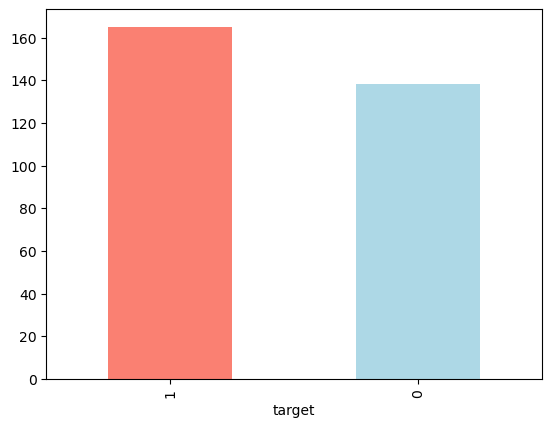

In [19]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency Accordeing to Sex

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [36]:
# comparing target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


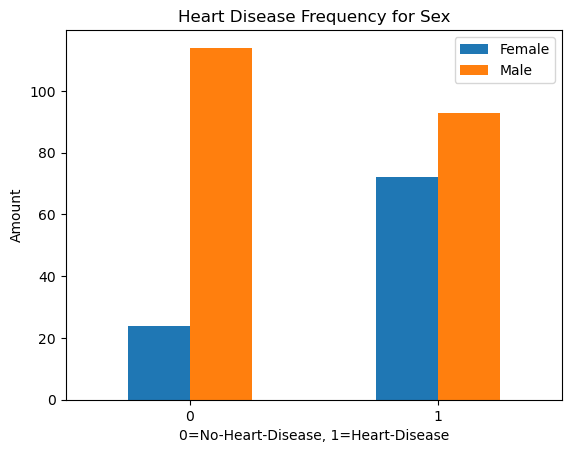

In [48]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0)
plt.xlabel("0=No-Heart-Disease, 1=Heart-Disease");
plt.title("Heart Disease Frequency for Sex")
plt.ylabel("Amount");

## Age versus Max Heart Rate for Herat Disease

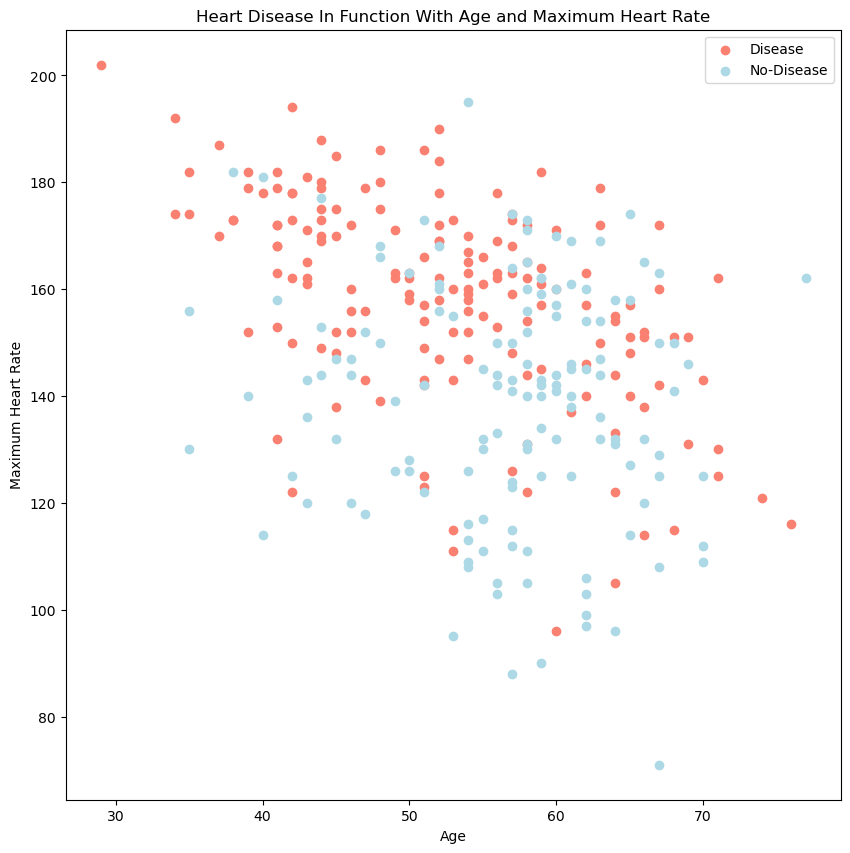

In [66]:
fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(df["age"][df["target"]==1],
                     df["thalach"][df["target"]==1],
                     c="salmon");
scatter = ax.scatter(df["age"][df["target"]==0],
                     df["thalach"][df["target"]==0],
                     c="lightblue");
ax.legend(["Disease", "No-Disease"]);
ax.set(title="Heart Disease In Function With Age and Maximum Heart Rate",
       xlabel="Age",
      ylabel="Maximum Heart Rate");

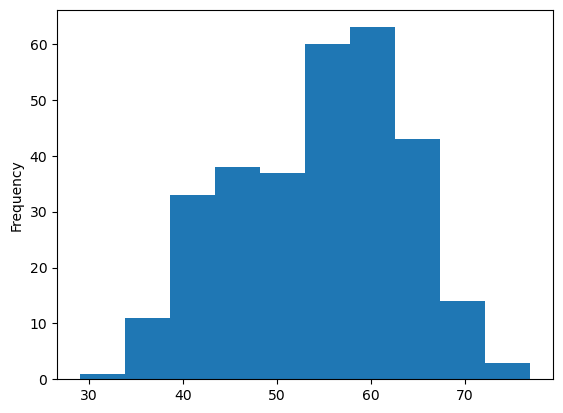

In [68]:
# check the distribution of the age with histogram
df["age"].plot(kind="hist");

### Heart Disease Frequency per Chest Pain Type
* chest pain type
  -- Value 1: typical angina
  -- Value 2: atypical angina
  -- Value 3: non-anginal pain
  -- Value 4: asymptomatic

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


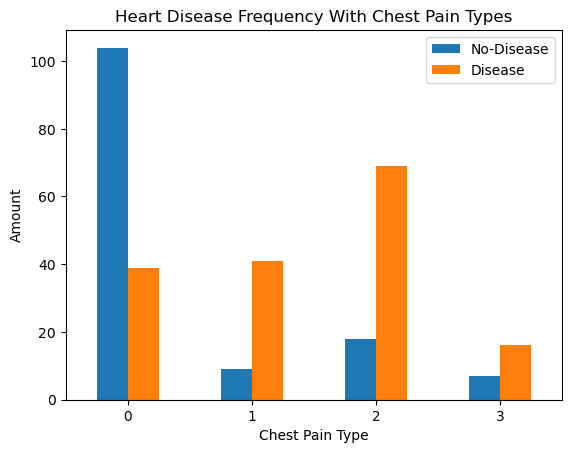

In [80]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar");
plt.xticks(rotation=1);
plt.legend(["No-Disease", "Disease"]);
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");
plt.title("Heart Disease Frequency With Chest Pain Types");

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
# making a correllation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


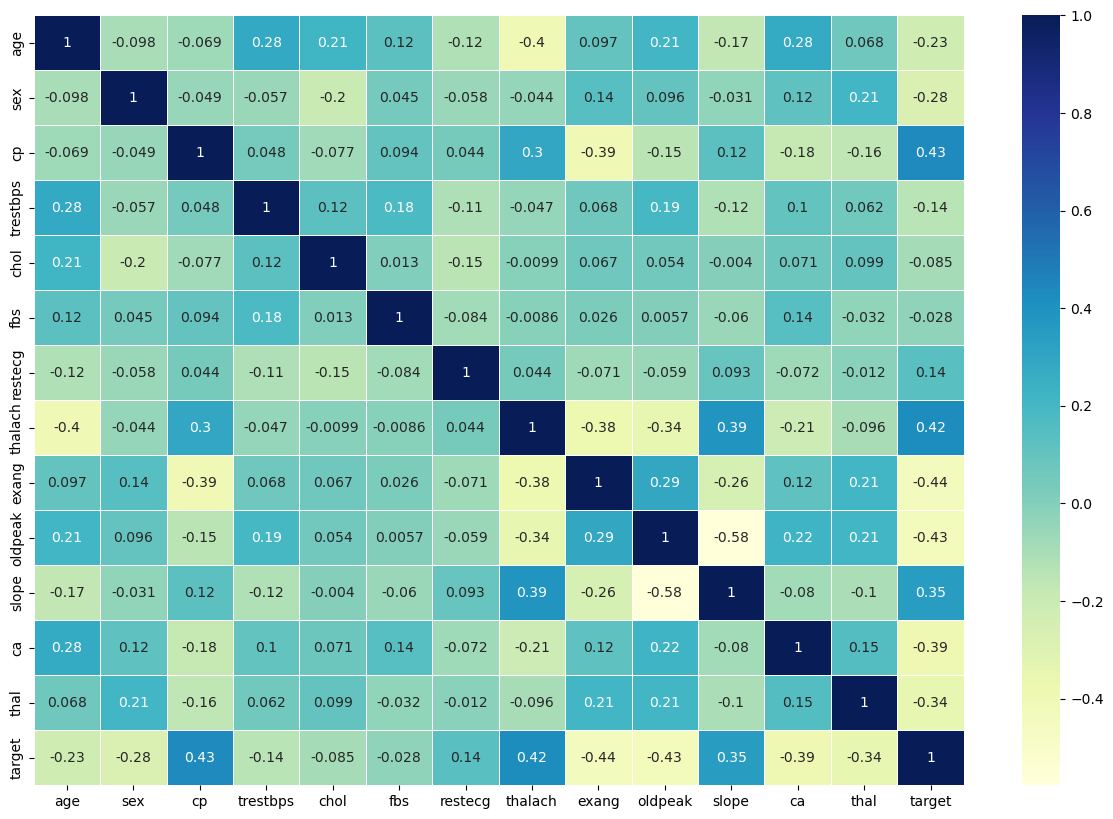

In [94]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),
                 cmap="YlGnBu",
                 annot=True,
                 linewidths=0.5)

# Modelling

In [97]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
# Splitting the data into X and y

np.random.seed(0)
X = df.drop("target", axis=1)
y = df["target"]

In [103]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [105]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [107]:
# Split data into train and test sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [111]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [113]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [115]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [117]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [119]:
# put models in dictionary

models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models  : a dict of different Scikit_Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(0)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [121]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\David\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

### Model Comparison

In [124]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.852459,0.639344,0.885246


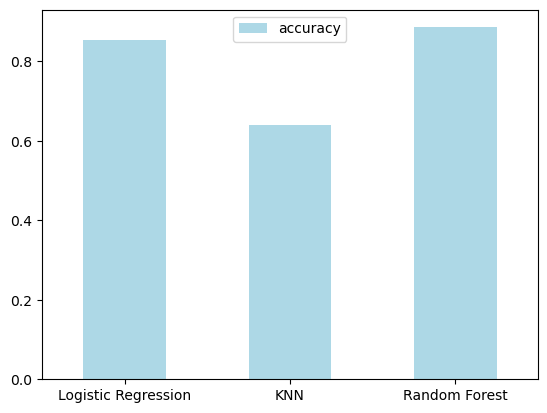

In [136]:
model_compare.T.plot(kind="bar",color=["lightblue"]);
plt.xticks(rotation=0);

## Hyperparameter tuning with RandimizedSearchCV

In [143]:
# tuning logistic regression
clf = LogisticRegression()
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [145]:
# creating a hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

In [148]:
clf_1 = RandomForestClassifier()
clf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [150]:
# creating a grid for randomforest classifier
grid = {"n_estimators":np.arange(10, 1000, 50),
        "max_depth":[None, 3, 5, 10],
        "min_samples_leaf":(np.arange(1, 20, 1)),
        "min_samples_split":(np.arange(2, 20, 2))}

In [152]:
# tune logisticregression
np.random.seed(0)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit the hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [154]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [160]:
# tuning randomforest classifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=grid,
                            n_iter=20,
                            cv=5,
                            verbose=True)

# fitting our tuned model
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [162]:
rs_rfc.score(X_test, y_test)

0.8524590163934426

## evaluating our tuned model

In [167]:
# making predictions with our tuned RandomForestClassifier model
y_preds = rs_rfc.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [175]:
# plotting roc curve and calculating the auc metric
from sklearn.metrics import RocCurveDisplay
y_proba = rs_rfc.predict_proba(X_test)
y_proba

array([[0.75766217, 0.24233783],
       [0.39834206, 0.60165794],
       [0.39946198, 0.60053802],
       [0.91450367, 0.08549633],
       [0.64490415, 0.35509585],
       [0.4647711 , 0.5352289 ],
       [0.74679844, 0.25320156],
       [0.77934359, 0.22065641],
       [0.884215  , 0.115785  ],
       [0.85627533, 0.14372467],
       [0.45697944, 0.54302056],
       [0.22214294, 0.77785706],
       [0.84637936, 0.15362064],
       [0.14349673, 0.85650327],
       [0.18795214, 0.81204786],
       [0.42287565, 0.57712435],
       [0.638965  , 0.361035  ],
       [0.28903954, 0.71096046],
       [0.88883044, 0.11116956],
       [0.34214128, 0.65785872],
       [0.24714825, 0.75285175],
       [0.59672728, 0.40327272],
       [0.64140254, 0.35859746],
       [0.67010827, 0.32989173],
       [0.19196492, 0.80803508],
       [0.553543  , 0.446457  ],
       [0.64854957, 0.35145043],
       [0.55181251, 0.44818749],
       [0.13778917, 0.86221083],
       [0.35406307, 0.64593693],
       [0.

In [177]:
y_pos = y_proba[:,1]
y_pos

array([0.24233783, 0.60165794, 0.60053802, 0.08549633, 0.35509585,
       0.5352289 , 0.25320156, 0.22065641, 0.115785  , 0.14372467,
       0.54302056, 0.77785706, 0.15362064, 0.85650327, 0.81204786,
       0.57712435, 0.361035  , 0.71096046, 0.11116956, 0.65785872,
       0.75285175, 0.40327272, 0.35859746, 0.32989173, 0.80803508,
       0.446457  , 0.35145043, 0.44818749, 0.86221083, 0.64593693,
       0.65473379, 0.23702812, 0.90010428, 0.70250561, 0.8940963 ,
       0.5183627 , 0.25731826, 0.85246182, 0.24641278, 0.39628147,
       0.62642673, 0.53372369, 0.71280732, 0.25154392, 0.4559903 ,
       0.68450324, 0.74610726, 0.52711204, 0.17618003, 0.72066494,
       0.84433037, 0.54492145, 0.80908001, 0.73233182, 0.93916852,
       0.28644883, 0.67874102, 0.67992102, 0.7210276 , 0.87684804,
       0.55541329])

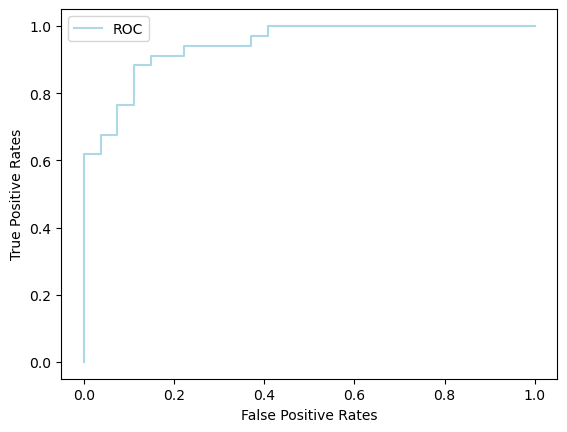

In [179]:
# plotting the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pos)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label="ROC", c="lightblue")
    plt.legend()
    plt.xlabel("False Positive Rates")
    plt.ylabel("True Positive Rates")
    plt.show()

plot_roc_curve(fpr, tpr)

In [181]:
roc_auc_score(y_test, y_pos)

0.9444444444444444

In [183]:
# confusion matrix
confusion_matrix(y_test, y_preds)

array([[21,  6],
       [ 3, 31]], dtype=int64)

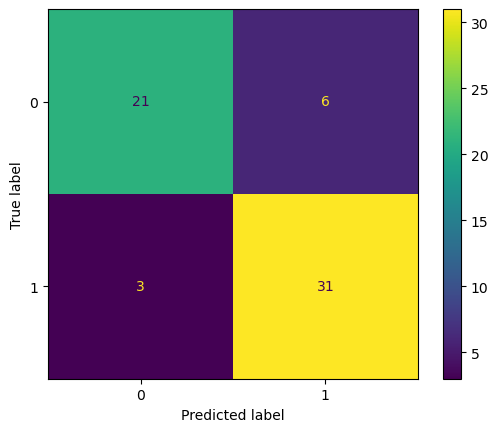

In [187]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

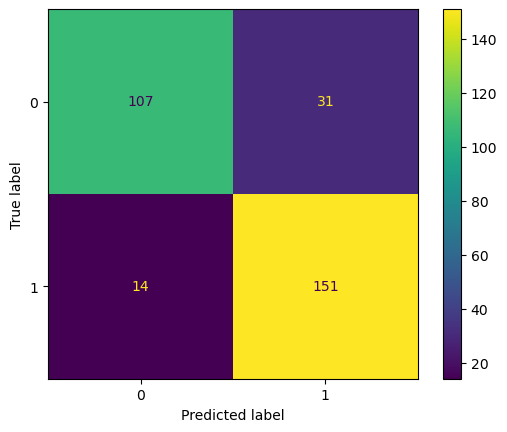

In [189]:
ConfusionMatrixDisplay.from_estimator(rs_rfc, X, y);

In [191]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



## calculating evaluating metrics using cross val score

In [202]:
rs_rfc.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 16,
 'max_depth': 5}

In [210]:
clf = RandomForestClassifier(n_estimators= 510,
                             min_samples_split= 14,
                             min_samples_leaf= 16,
                             max_depth= 5)

In [220]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8381967213114754

In [222]:
# cross validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8336581829790658

In [224]:
# cross validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8848484848484848

In [226]:
# cross validated f1
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8585779081354051

In [230]:
# visualizing our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "f1":cv_f1,
                           "recall":cv_recall},
                         index=["Score"])
cv_metrics

,Accuracy,Precision,f1,recall
Score,0.838197,0.833658,0.858578,0.884848


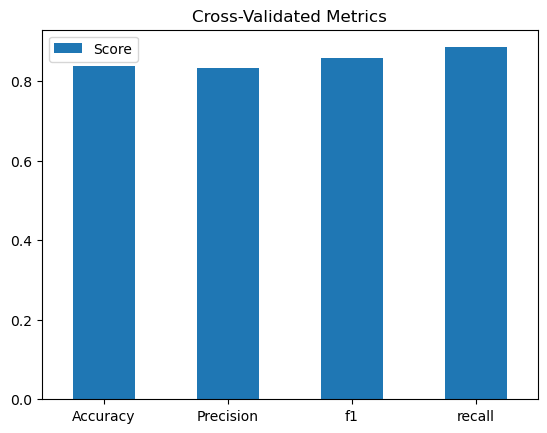

In [236]:
cv_metrics.T.plot(kind="bar");
plt.xticks(rotation=0);
plt.title("Cross-Validated Metrics");

## Feature Importance

In [239]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [253]:
clf.fit(X_train, y_train)
clf.feature_importances_

array([4.02127808e-02, 4.50250708e-02, 1.68524033e-01, 1.47027097e-02,
       2.00665166e-02, 5.23244796e-05, 5.32861545e-03, 1.18959866e-01,
       1.01391569e-01, 1.10706245e-01, 4.01978696e-02, 1.86642409e-01,
       1.48189990e-01])

In [255]:
features_dict = dict(zip(df.columns, list(clf.feature_importances_)))
features_dict

{'age': 0.0402127808257266,
 'sex': 0.04502507081344034,
 'cp': 0.16852403335542976,
 'trestbps': 0.014702709734833081,
 'chol': 0.020066516611753994,
 'fbs': 5.23244795900928e-05,
 'restecg': 0.005328615445754358,
 'thalach': 0.1189598663372766,
 'exang': 0.1013915686193892,
 'oldpeak': 0.11070624519459939,
 'slope': 0.04019786963679499,
 'ca': 0.18664240930857318,
 'thal': 0.1481899896368384}

Text(0.5, 1.0, 'Feature Importance')

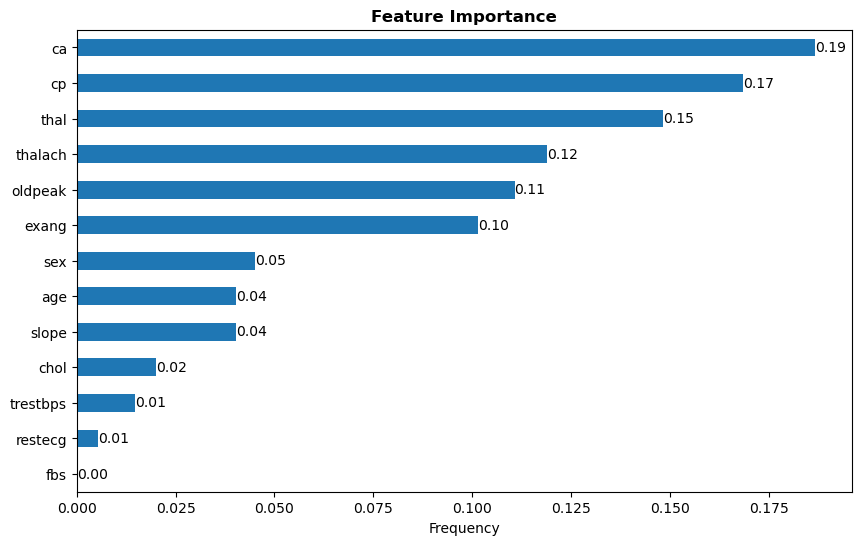

In [259]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
# Sort the DataFrame by values in ascending order
sorted_df = features_df.T.sort_values(by=0, ascending=True)
# Plot the sorted DataFrame
ax = sorted_df.plot(kind='barh', figsize=(10, 6), legend=False)
# Add text annotations for each bar
for i, v in enumerate(sorted_df[0]):
#     ax.text(v, i, str(v), ha='left', va='center')
    ax.text(v, i, f"{v:.2f}", ha='left', va='center')
plt.xlabel('Frequency')
plt.title('Feature Importance', fontweight='bold')
#plt.grid(linewidth=0.2, alpha=0.7)

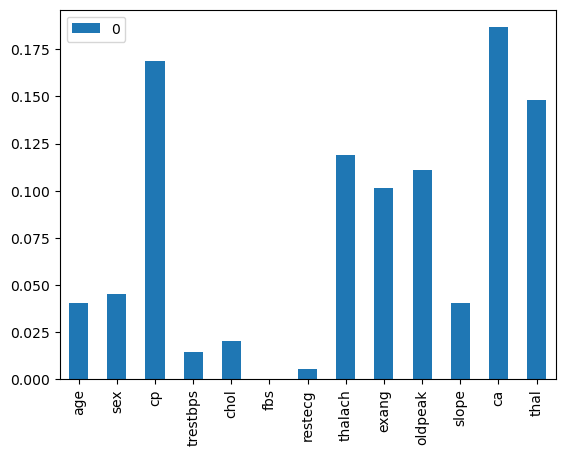

In [275]:
# visualing our feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar();